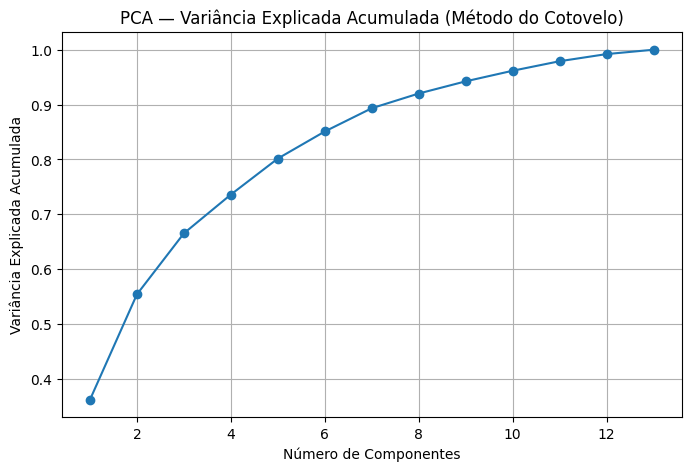

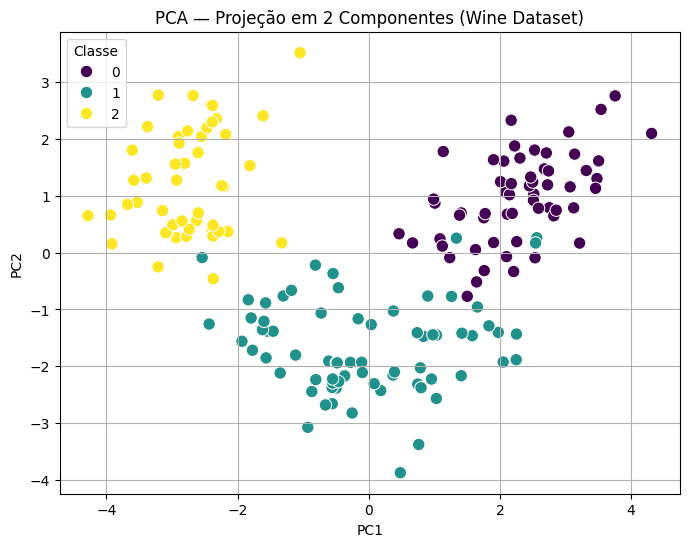

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ============================================================
# 1. Carregar dataset real (Wine)
# ============================================================
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# ============================================================
# 2. Padronizar os dados (PCA exige)
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================
# 3. Aplicar PCA
# ============================================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ============================================================
# 4. Plot 1 — Variância explicada (cotovelo do PCA)
# ============================================================
pca_full = PCA().fit(X_scaled)
explained = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("PCA — Variância Explicada Acumulada (Método do Cotovelo)")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.grid(True)
plt.show()

# ============================================================
# 5. Plot 2 — Scatter plot das 2 primeiras componentes
# ============================================================
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=y,
    palette="viridis",
    s=80
)
plt.title("PCA — Projeção em 2 Componentes (Wine Dataset)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Classe")
plt.grid(True)
plt.show()
